In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio

In [2]:
rtemp = rio.open('./agg_met_tmmx_1979_CurrentYear_CONUS.nc.nc4')

In [3]:
rtemp.meta


{'driver': 'netCDF',
 'dtype': 'uint16',
 'nodata': 32767.0,
 'width': 1386,
 'height': 585,
 'count': 366,
 'crs': None,
 'transform': Affine(0.041666666666666664, 0.0, -124.78749996666667,
        0.0, -0.04166666666666668, 49.42083333333334)}

In [4]:
import geopandas as gpd
gp_counties = gpd.read_file('./USA_1990-2000_Population_Change.shp')

In [5]:
gp_montana = gp_counties[gp_counties['NAME'] == 'Montana']

In [6]:
gp_montana

,OBJECTID,ID,NAME,ST_ABBREV,TOTPOP_CY,RATE_POP,POPGRW00CY,POPGRWCYFY,LANDAREA,NAME_12,ST_ABBREV_,RATE_POP_1,POPGRW00_1,POPGRWCY_1,LANDAREA_1,geometry
20,21,30,Montana,MT,983932,1.2,0.85,0.92,145552.434,Montana,MT,1.2,0.85,0.92,145552.434,"POLYGON ((-111.04898 44.47407, -111.12265 44.4..."


In [7]:
import rasterio.mask
npMontana, aff = rasterio.mask.mask(rtemp, gp_montana['geometry'],filled=False)

In [8]:
npMontana=(npMontana.T*rtemp.scales).T
meantemp=np.mean(npMontana, axis=0)
meantemp=meantemp+220

Text(108.0, 0.5, 'Average Maximum Temperature.,Montana (K)')

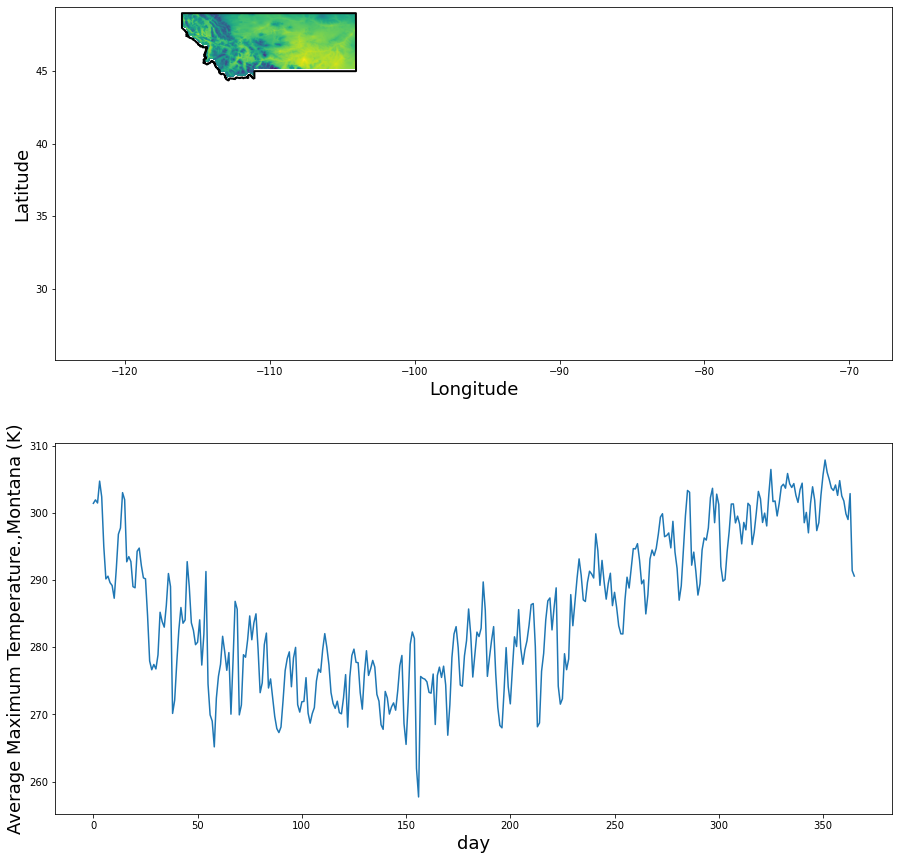

In [11]:
from rasterio.plot import show
fig, plot_axis = plt.subplots(2, 1, figsize=(15,15))
vector_image = gp_montana.plot(ax=plot_axis[0], facecolor="none",edgecolor='black', lw=2)
show(meantemp, ax=plot_axis[0], transform=aff)
plot_axis[0].set_xlabel("Longitude", fontsize=18)
plot_axis[0].set_ylabel("Latitude", fontsize=18)
plot_axis[1].plot(np.arange(npMontana.shape[0]), 220+npMontana.mean(axis=(1,2)))
#plot_axis[1].plot(datelist, temp)
plot_axis[1].set_xlabel('day', fontsize=18)
plot_axis[1].set_ylabel('Average Maximum Temperature.,Montana (K)', fontsize=18)